In [3]:
! wget -O genomic_sequence_plus_features_hl_all_tissues.csv "https://docs.google.com/uc?export=download&id=1w_HDUL9o66Kmn_LK7aWet0gccVaOAI5n"

import numpy as np
import pandas as pd
from palettable.matplotlib import matplotlib
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,explained_variance_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# get the data
tissue_hl = pd.read_csv('genomic_sequence_plus_features_hl_all_tissues.csv', index_col=0)
tissue_hl = tissue_hl.loc[tissue_hl.loc[:, ['3_utr', '5_utr']].dropna().index]

#get all tissues
tissues = tissue_hl.columns[:49]

df = tissue_hl

df = tissue_hl
for i in range (49):  #49
  df=df.rename(columns={tissues[i]:i})

df=pd.melt(df,id_vars=df.columns[49:], value_vars=df.columns[0:49], var_name="tissue",value_name="half_life")




def lasso(df):

    df1 = df.drop(columns=['cds', '3_utr', '5_utr', 'all', 'chromosome', 'AAA', 'AAC',
                           'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT',
                           'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC',
                           'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT',
                           'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC',
                           'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT',
                           'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC',
                           'TTG', 'TTT'])

    df1 = df1.loc[df1.loc[:, ['half_life']].dropna().index]
    X = df1.drop('half_life', axis=1)
    y = df1['half_life']
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)

    model = Lasso()

    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.33, random_state=42)

    param = {
        'alpha':[.00001, 0.0001,0.001, 0.01],
        'fit_intercept':[True,False],
        'normalize':[True,False],
        'positive':[True,False],
        'selection':['cyclic','random'],
        }

    search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

    result = search.fit(X_sc, y)

    df1 = df.drop(columns=['cds', '3_utr', '5_utr', 'all', 'chromosome'])
    df1 = df1.loc[df1.loc[:, ['half_life']].dropna().index]
    X = df1.drop('half_life', axis=1)
    y = df1['half_life']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model = Lasso(alpha=result.best_params_['alpha'], fit_intercept=result.best_params_['fit_intercept'], normalize=result.best_params_['normalize'], positive=result.best_params_['positive'], selection=result.best_params_['selection'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(explained_variance_score(y_test, y_pred))

    return explained_variance_score(y_test, y_pred)

results = []

for i in range(49):
    df2 = df.loc[df['tissue'] == i]
    results.append(lasso(df2))

--2021-06-07 18:09:31--  https://docs.google.com/uc?export=download&id=1w_HDUL9o66Kmn_LK7aWet0gccVaOAI5n
Resolving docs.google.com (docs.google.com)... 108.177.97.101, 108.177.97.100, 108.177.97.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ebgbv2qpp6nuc7fumbmh6fg58h78jelq/1623089325000/03130359425596125025/*/1w_HDUL9o66Kmn_LK7aWet0gccVaOAI5n?e=download [following]
--2021-06-07 18:09:34--  https://doc-14-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ebgbv2qpp6nuc7fumbmh6fg58h78jelq/1623089325000/03130359425596125025/*/1w_HDUL9o66Kmn_LK7aWet0gccVaOAI5n?e=download
Resolving doc-14-2o-docs.googleusercontent.com (doc-14-2o-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-14-2o-docs.googleusercontent.com (doc-14-2o-

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.792341978543845, tolerance: 4.028138109910565
  positive)


0.09530750901431573


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.33428485449622, tolerance: 3.6361866810101415
  positive)


0.09775838607919607
0.10860972559439186


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.788130912907945, tolerance: 4.101229234348776
  positive)


0.08202004176399147
0.08979845619441185
0.09635972973963347
0.09534978890529344


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.523180507545476, tolerance: 3.9319403040758614
  positive)


0.1078706841389212
0.058129138611673126
0.09626623444860527
0.09897261152268177
0.09790947287142804
0.08916163523468634
0.08440702597075866
0.09210447919495734


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2769.756312798363, tolerance: 3.771697260013545
  positive)


0.10943598320369052
0.09619948410386814
0.10603866647712923
0.06148509344262765
0.02119845159235889
0.09959563562552354
0.11427570890768401
0.10292877771562425
0.0937763018001605
0.03922008304435787
0.09678244837436945
0.09442104584886479
0.0392595093336402
0.04880173351211181
0.09113134422012548
0.09627926899929506
0.08139390078948261
0.09376224940325295
0.11363454891900793
0.056024674426540244
0.09979902698064091
0.0964156194203829


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328.43524043242724, tolerance: 4.033647669451108
  positive)


0.11017606819178016


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418.1597074441488, tolerance: 3.9687097778621894
  positive)


0.14386994198364644


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9470.256057915134, tolerance: 4.324403741294866
  positive)


0.12026530941075475


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.25205604869916, tolerance: 3.714209701862343
  positive)


0.09255331141873413
0.048576569343310894


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106.57142197328, tolerance: 3.5155400539507173
  positive)


0.0993992763321766
0.036737083800778


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.792340353131294, tolerance: 4.11814093739396
  positive)


0.09652866005907756
0.08875639282388514
0.12442931057469708
0.0962518985738341


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



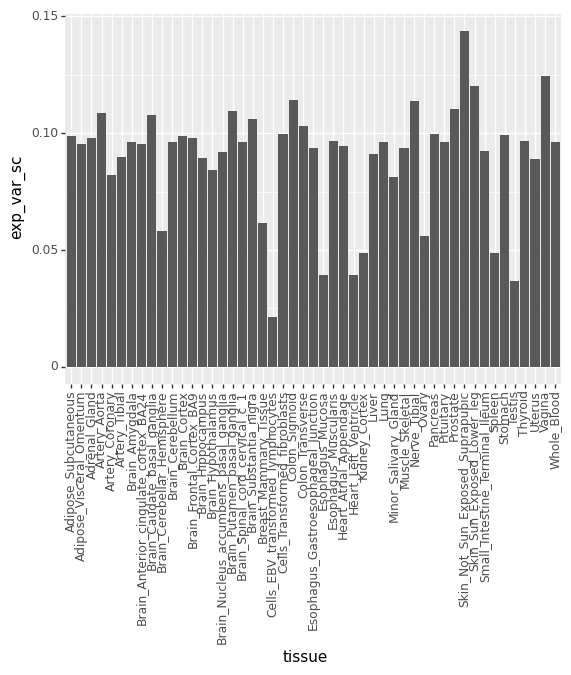

<ggplot: (8744973502017)>

In [15]:
res = {'exp_var_sc':results,'tissue':tissues}
eval = pd.DataFrame(res)
import plotnine as p9
p9.ggplot(eval, p9.aes('tissue', 'exp_var_sc')) + p9.geom_col() + p9.theme(axis_text_x = p9.element_text(angle = 90))